# Examine Dudh Kosi ti-melt model inputs and results

In [1]:
from __future__ import print_function
%pylab notebook
import datetime as dt
import glob
import matplotlib.pyplot as plt
import pdb
from charistools.hypsometry import Hypsometry
from charistools.meltModels import ImshowTriSurfMelt
from charistools.meltModels import PlotTriSurfInput
from charistools.meltModels import PlotTriSurfMelt
from charistools.modelEnv import ModelEnv
from charistools.timeSeries import TimeSeries
import pandas as pd
import re
import os

Populating the interactive namespace from numpy and matplotlib


# Look at SOL input and melt for basin id 11066

In [8]:
dir = '/work/charis/ti_model/derived_hypsometries/partner_basins/GA_DudhKosi_at_GokyoHydroID11066'
%cd $dir
%ls *2012*2strike*

nstrikes = 2
year = 2012
solHyps2012 = Hypsometry('GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.snow_on_land_area_by_elev.txt')
solMeltHyps2012 = Hypsometry('GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.snow_on_land_melt_by_elev.best_Karnali_SA_model.txt')


/work/charis/ti_model/derived_hypsometries/partner_basins/GA_DudhKosi_at_GokyoHydroID11066
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.GRSIZE_SCAG.fromFile.best_Karnali_SA_model.melt_hyps.png*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.GRSIZE_SCAG.fromFile.best_Karnali_SA_model.melt_tseries.png*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_area_by_elev.txt*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Karnali_SA_model.txt*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.GRSIZE_SCAG.fromFile.snow_on_ice_area_by_elev.txt*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Karnali_SA_model.txt*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike.snow_on_land_area_by_elev.txt*
GA_DudhKosi_at_GokyoHydroID11066.2012.0100m.modicev04_2strike

In [12]:
solHyps.data

,2900,3000,3100,3200,3300,3400,3500,3600,3700,3800,...,5300,5400,5500,5600,5700,5800,5900,6000,6100,6200
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.00,0.0,0.0,0.06,0.00,0.00,0.04,0.19,0.54,1.35,...,31.64,20.07,10.90,5.52,3.18,1.45,0.50,0.58,0.0,0.27
2012-01-02,0.02,0.0,0.0,0.07,0.00,0.02,0.11,0.28,0.87,1.90,...,42.43,26.86,14.02,6.96,3.88,1.67,0.56,0.59,0.0,0.29
2012-01-03,0.02,0.0,0.0,0.06,0.00,0.02,0.13,0.36,0.99,2.12,...,48.28,30.71,15.91,7.82,4.30,1.85,0.61,0.60,0.0,0.30
2012-01-04,0.00,0.0,0.0,0.05,0.00,0.00,0.14,0.36,0.95,2.14,...,48.92,31.31,16.19,7.99,4.30,1.84,0.60,0.58,0.0,0.30
2012-01-05,0.00,0.0,0.0,0.03,0.00,0.00,0.14,0.34,0.93,2.07,...,46.75,29.94,15.53,7.72,4.08,1.64,0.52,0.56,0.0,0.27
2012-01-06,0.00,0.0,0.0,0.02,0.00,0.00,0.12,0.32,0.93,1.94,...,44.76,28.53,14.82,7.41,3.91,1.50,0.47,0.56,0.0,0.27
2012-01-07,0.00,0.0,0.0,0.00,0.02,0.00,0.09,0.29,0.94,1.84,...,43.74,27.78,14.47,7.25,3.81,1.49,0.46,0.60,0.0,0.29
2012-01-08,0.00,0.0,0.0,0.00,0.02,0.00,0.09,0.26,0.94,1.76,...,43.42,27.61,14.33,7.24,3.75,1.54,0.49,0.65,0.0,0.31
2012-01-09,0.00,0.0,0.0,0.00,0.03,0.00,0.08,0.25,0.93,1.69,...,43.37,27.56,14.33,7.29,3.72,1.61,0.52,0.68,0.0,0.33


In [22]:
sol_by_doy = solHyps.data_by_doy()
sol_melt_by_doy = solMeltHyps.data_by_doy()

In [32]:
sol_by_doy

Date
2012-01-01    274.48
2012-01-02    387.02
2012-01-03    445.76
2012-01-04    453.79
2012-01-05    435.79
2012-01-06    416.91
2012-01-07    406.26
2012-01-08    402.01
2012-01-09    399.46
2012-01-10    396.51
2012-01-11    390.74
2012-01-12    384.08
2012-01-13    376.34
2012-01-14    364.56
2012-01-15    347.30
2012-01-16    324.23
2012-01-17    305.89
2012-01-18    290.16
2012-01-19    276.84
2012-01-20    259.32
2012-01-21    234.48
2012-01-22    212.83
2012-01-23    192.86
2012-01-24    177.18
2012-01-25    159.70
2012-01-26    148.82
2012-01-27    141.19
2012-01-28    133.63
2012-01-29    125.78
2012-01-30    114.89
               ...  
2012-12-02     33.03
2012-12-03     38.60
2012-12-04     41.19
2012-12-05     38.48
2012-12-06     32.20
2012-12-07     28.97
2012-12-08     29.06
2012-12-09     33.41
2012-12-10     39.73
2012-12-11     45.96
2012-12-12     57.22
2012-12-13     68.83
2012-12-14     71.60
2012-12-15     62.95
2012-12-16     53.48
2012-12-17     47.94
2012-12-

In [27]:
sol_melt_by_month = sol_melt_by_doy.groupby([pd.TimeGrouper('M')]).sum().to_frame(name='melt')
yyyymm_index = pd.to_datetime(sol_melt_by_month.index.map(lambda x: x.strftime('%Y-%m-15')))
df = pd.DataFrame(data=sol_melt_by_month.values, index=yyyymm_index, columns=['melt'])
df['SOLmelt'] = sol_melt_by_doy.groupby([pd.TimeGrouper('M')]).sum().values
df
#sol_melt_by_month
    

,melt,SOLmelt
2012-01-15,0.000005,0.000005
2012-02-15,0.000173,0.000173
2012-03-15,0.000669,0.000669
2012-04-15,0.001526,0.001526
2012-05-15,0.019400,0.019400
2012-06-15,0.095879,0.095879
2012-07-15,0.163228,0.163228
2012-08-15,0.087817,0.087817
2012-09-15,0.065042,0.065042
2012-10-15,0.001259,0.001259


<IPython.core.display.Javascript object>


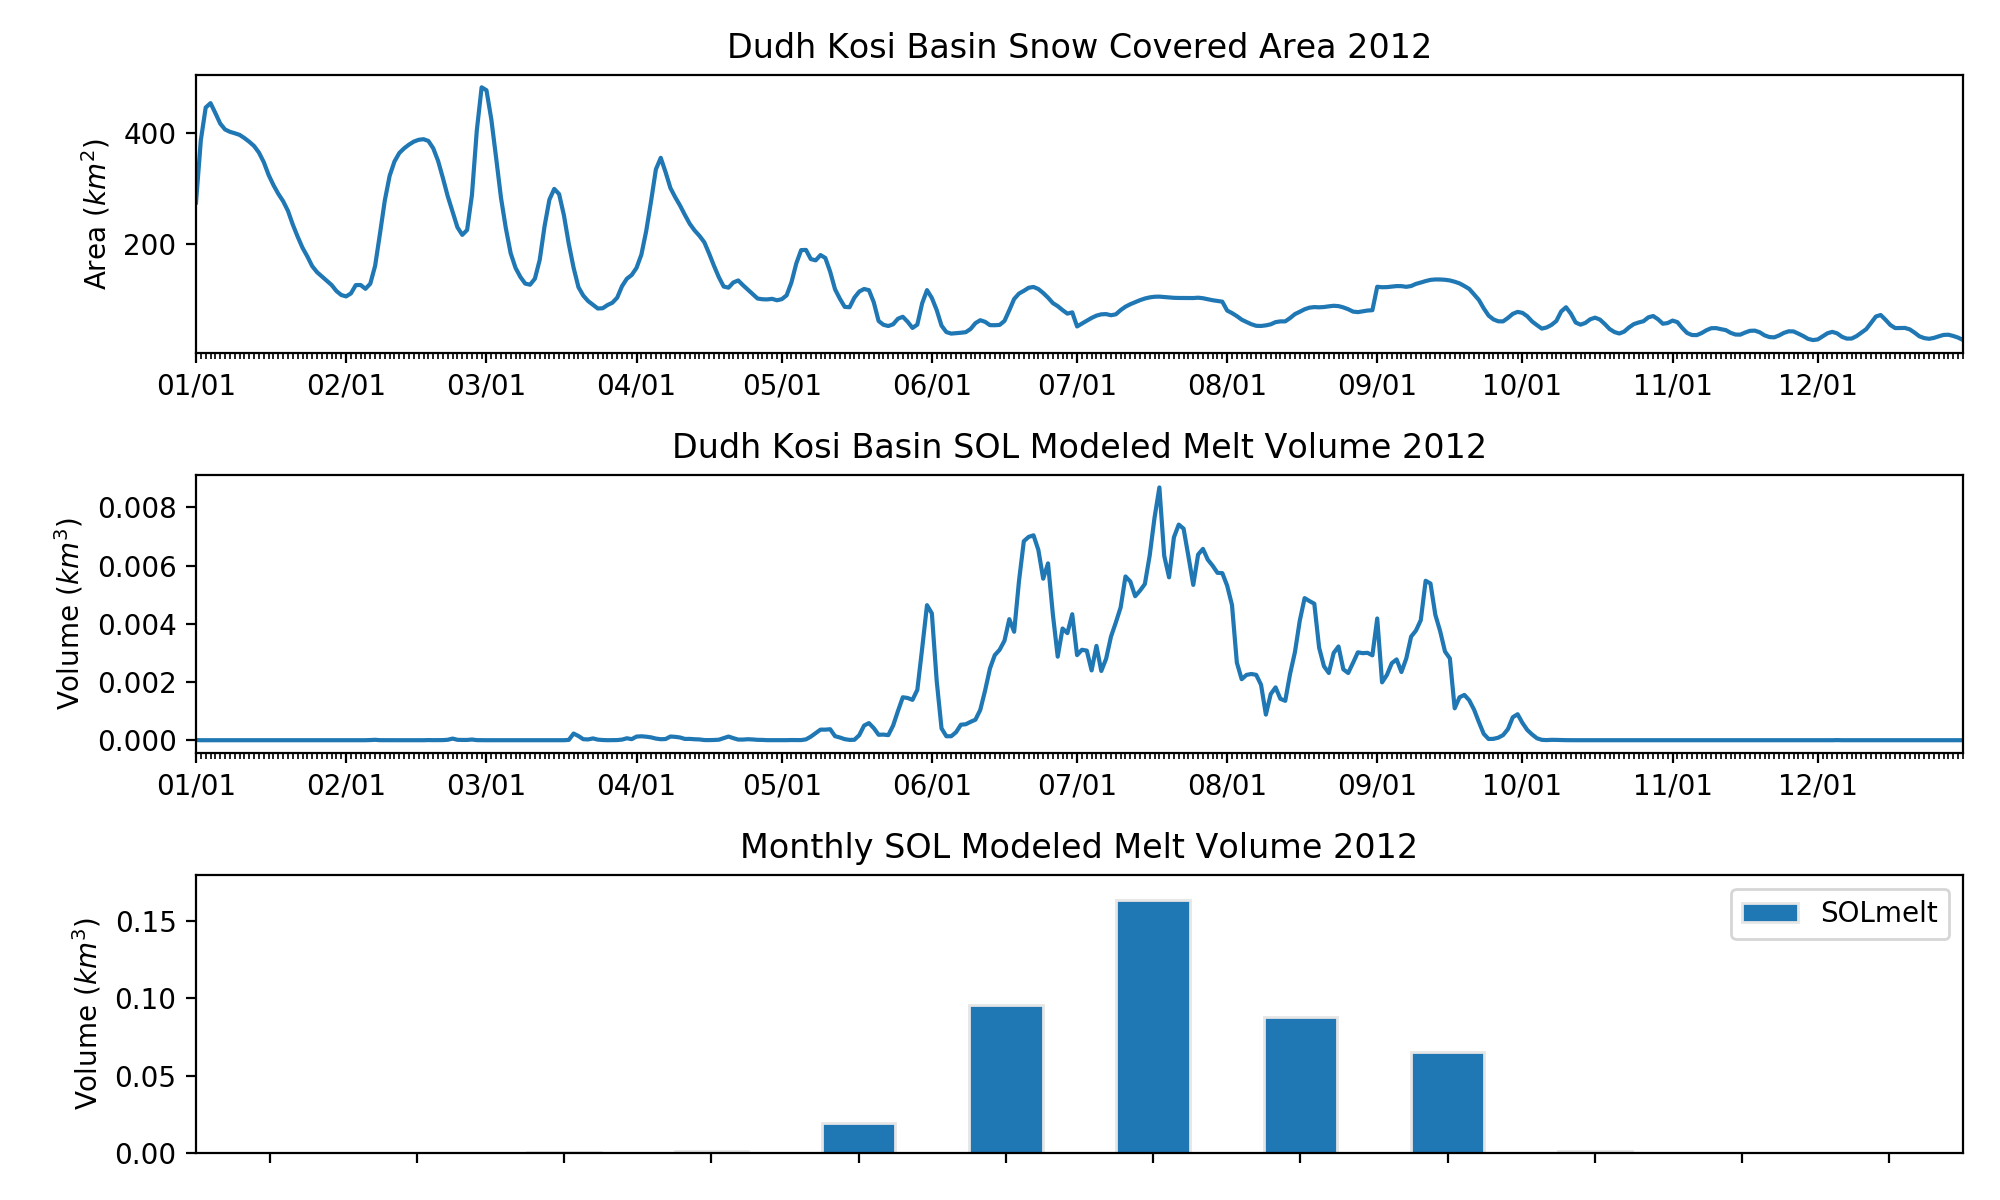

Wrote melt_hyps to basin_SOL_area_and_melt.2012.png


In [30]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(3, 1, figsize=(10,6))
ax[0].plot(sol_by_doy)
ax[0].set_title('Dudh Kosi Basin Snow Covered Area 2012')
ax[0].set_ylabel('Area (' + r'$km^2$' + ')') 

ax[1].plot(sol_melt_by_doy)
ax[1].set_title('Dudh Kosi Basin SOL Modeled Melt Volume 2012')
ax[1].set_ylabel('Volume (' + r'$km^3$' + ')') 

start = dt.datetime(2012,1,1)
end = dt.datetime(2012,12,31)
dates_list = [start + dt.timedelta(days=x) for x in range(0, (end-start).days+1)]

myFmt = mdates.DateFormatter('%m/%d') 
months = mdates.MonthLocator()  
days = mdates.DayLocator(bymonthday=(1))   
dayss = mdates.DayLocator()

for i in np.arange(2):
    ax[i].set_xlim(dates_list[0],dates_list[-1])
    ax[i].xaxis.set_major_formatter(myFmt)
    ax[i].xaxis.set_major_locator(days)
    ax[i].xaxis.set_minor_locator(dayss)
    
ylim = np.amax(df["SOLmelt"])
ylim_min = 0.
df[["SOLmelt"]].plot(ax=ax[2], kind="bar",
                     edgecolor=(0.9, 0.9, 0.9))
ax[2].set_title("Monthly SOL Modeled Melt Volume 2012")
ax[2].set_ylabel('Volume (' + r'$km^3$' + ')') 
ax[2].xaxis.set_major_formatter(plt.NullFormatter())
#for container in ax[2].containers:
#    plt.setp(container, width=0.25)
ax[2].set_ylim([1.1 * ylim_min, 1.1 * ylim])
#ax[2].text(ax[2].get_xlim()[0] + (0.03 * (ax[2].get_xlim()[1] - ax[2].get_xlim()[0])),
#          ax[2].get_ylim()[1] * 0.7,
#          monthly_annotation,
#          style='italic',
#          bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
#        handles, labels = ax[2].get_legend_handles_labels()
#ax[3].legend(loc='upper right')    

fig.tight_layout()
outfile = "basin_SOL_area_and_melt.2012.png"
fig.savefig(outfile)
print("Wrote melt_hyps to %s" % outfile)



In [37]:
%pwd
%ls sca*txt




sca2012.txt  sca2016.txt


In [66]:
scag2016 = pd.read_csv('sca2016.txt', sep=' ')
scag2016 = scag2016.set_index('Date')
scag2016.index = pd.to_datetime(scag2016.index, format='%Y%m%d')
scag2016

,SCA_km2
Date,
2016-01-01,179.5421
2016-01-02,177.9656
2016-01-03,180.2751
2016-01-04,184.7209
2016-01-05,186.6107
2016-01-06,182.5040
2016-01-07,178.7603
2016-01-08,177.2894
2016-01-09,172.4630


In [63]:
scag2012 = pd.read_csv('sca2012.txt', sep=' ')
scag2012 = scag2012.set_index('Date')
scag2012.index = pd.to_datetime(scag2012.index, format='%Y%m%d')
scag2012

,SCA_km2
Date,
2012-01-01,58.2485
2012-01-02,49.6950
2012-01-03,40.6192
2012-01-04,38.9473
2012-01-05,37.4012
2012-01-06,34.7471
2012-01-07,31.3173
2012-01-08,27.3376
2012-01-09,25.0254


In [70]:
tmp = scag2016.copy()
tmp

,SCA_km2
Date,
2016-01-01,179.5421
2016-01-02,177.9656
2016-01-03,180.2751
2016-01-04,184.7209
2016-01-05,186.6107
2016-01-06,182.5040
2016-01-07,178.7603
2016-01-08,177.2894
2016-01-09,172.4630


In [71]:
tmp.index = tmp.index - pd.DateOffset(years=4)
tmp

,SCA_km2
Date,
2012-01-01,179.5421
2012-01-02,177.9656
2012-01-03,180.2751
2012-01-04,184.7209
2012-01-05,186.6107
2012-01-06,182.5040
2012-01-07,178.7603
2012-01-08,177.2894
2012-01-09,172.4630


<IPython.core.display.Javascript object>


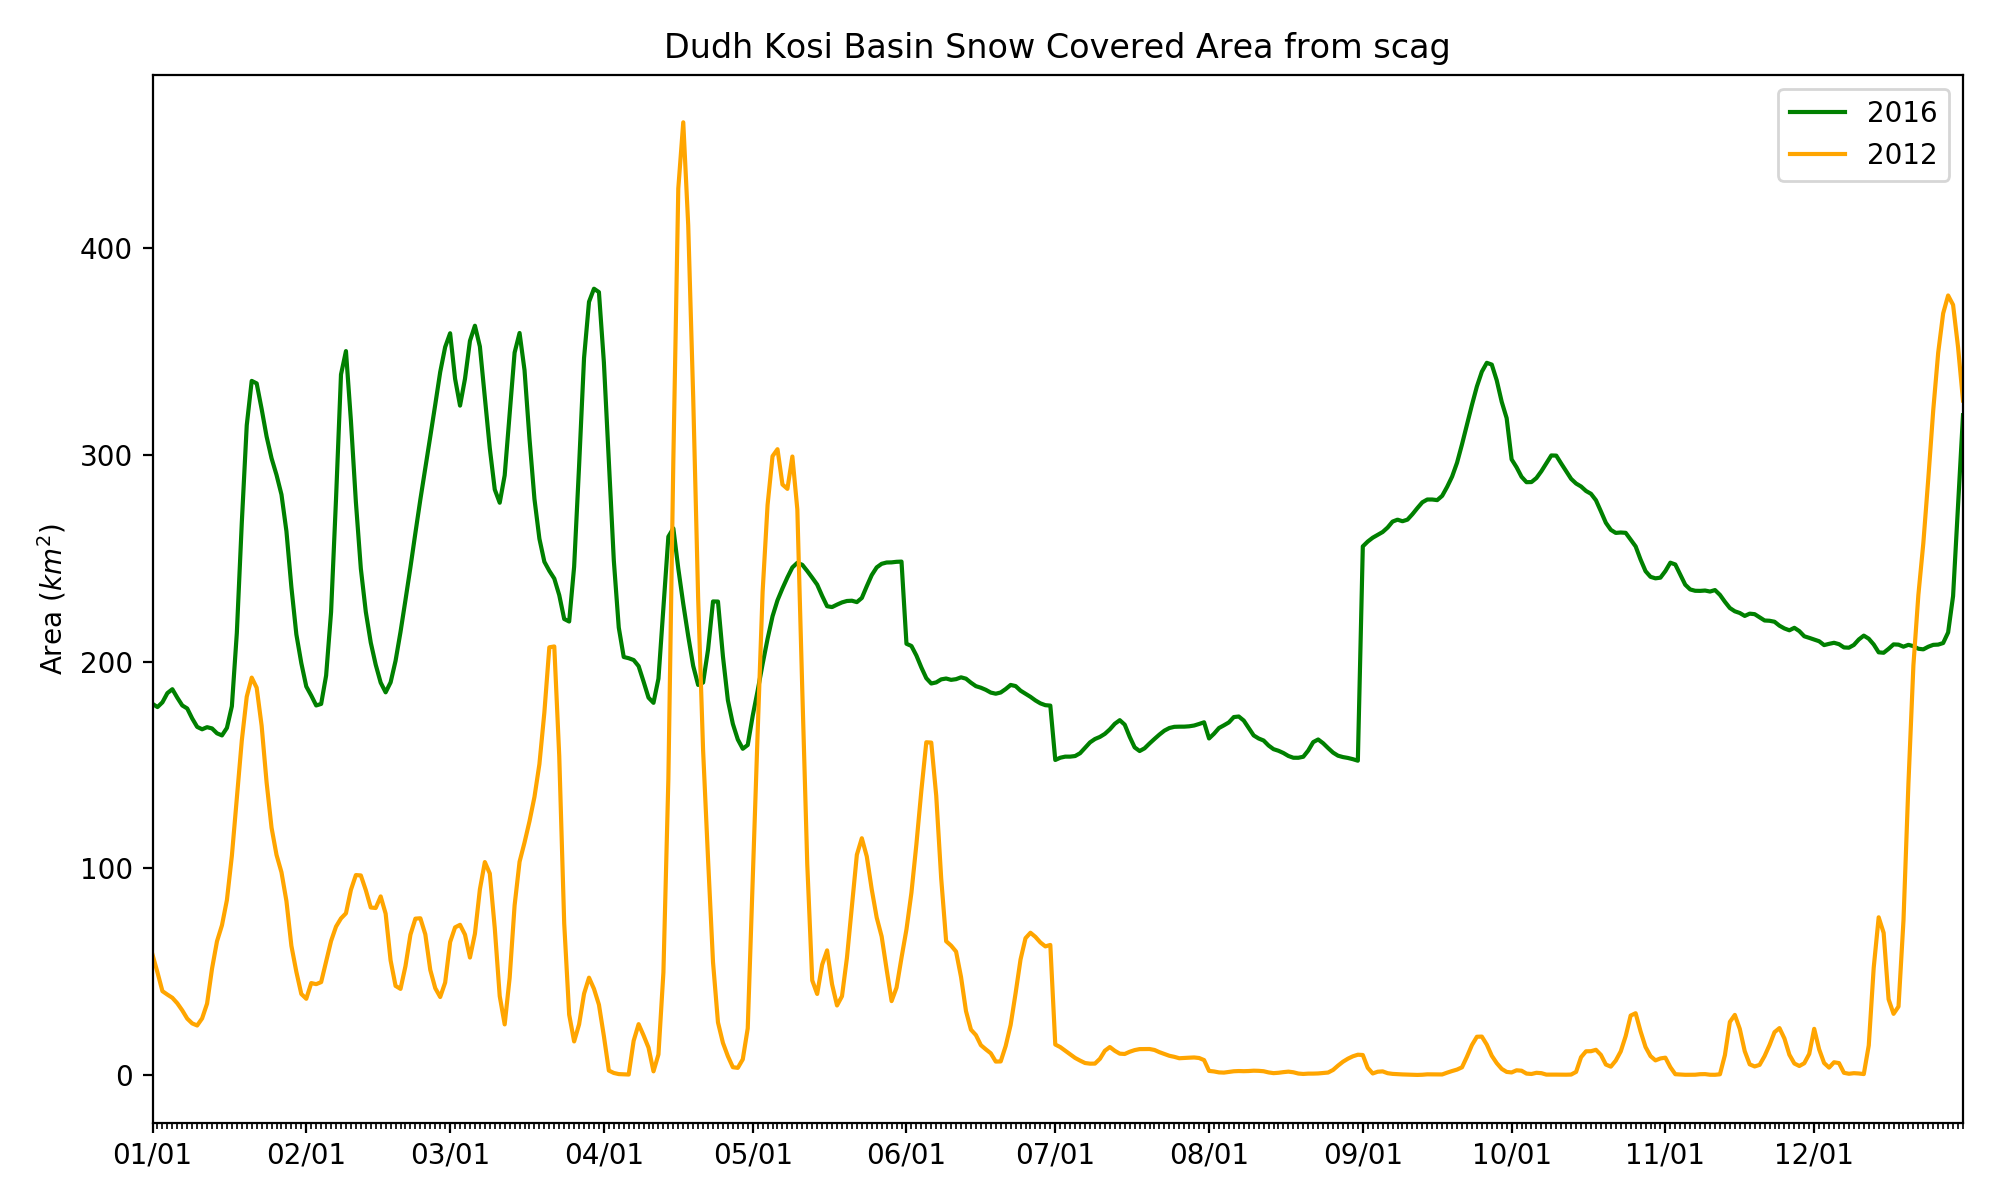

Wrote to scag2012_vs_2016.png


In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.plot(tmp.SCA_km2, label='2016', color='green')
ax.plot(scag2012.SCA_km2, label='2012', color='orange')
ax.set_ylabel('Area (' + r'$km^2$' + ')') 

ax.set_title('Dudh Kosi Basin Snow Covered Area from scag')

start = dt.datetime(2012,1,1)
end = dt.datetime(2012,12,31)
dates_list = [start + dt.timedelta(days=x) for x in range(0, (end-start).days+1)]

myFmt = mdates.DateFormatter('%m/%d') 
months = mdates.MonthLocator()  
days = mdates.DayLocator(bymonthday=(1))   
dayss = mdates.DayLocator()

for i in np.arange(2):
    ax.set_xlim(dates_list[0],dates_list[-1])
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_minor_locator(dayss)

# myFmt = mdates.DateFormatter('%m/%d')
# ax.xaxis.set_major_formatter(myFmt)

ax.legend()
fig.tight_layout()
outfile = "scag2012_vs_2016.png"
fig.savefig(outfile)
print("Wrote to %s" % outfile)


In [79]:
%pwd


u'/work/charis/ti_model/derived_hypsometries/partner_basins/GA_DudhKosi_at_GokyoHydroID11066'

In [ ]:
def show_melt_tseries(myEnv, drainageID, year, baseFilename, input, model_str,
                      SOLmelt, SOImelt, EGImelt,
                      label='best_model',
                      DDF_annotation=True, show_rainfall=False, rainfall_col=None, 
                      show_runoff=False,
                      closePlot=True):
    year_str = str(year)
    (min_snow_ddf, max_snow_ddf, min_ice_ddf, max_ice_ddf) = model_str.split("_")
    min_snow_ddf = float(min_snow_ddf)
    max_snow_ddf = float(max_snow_ddf)
    min_ice_ddf = float(min_ice_ddf)
    max_ice_ddf = float(max_ice_ddf)
    
    melt_by_doy = (SOLmelt.data_by_doy() +
                   SOImelt.data_by_doy() +
                   EGImelt.data_by_doy())
    total_melt = melt_by_doy.sum()
    print("total melt = %.2f" % total_melt, file=sys.stderr)
    
    fig, ax = plt.subplots(3,1,figsize=(9,9))
    
    if melt_by_doy.empty:
        ax[0].annotate('no data', xy=(0.5, 0.5), xytext=(0.5, 0.5))
        ax[1].annotate('no data', xy=(0.5, 0.5), xytext=(0.5, 0.5))
        ax[2].annotate('no data', xy=(0.5, 0.5), xytext=(0.5, 0.5))
        
    else:
        
        melt_by_month = melt_by_doy.groupby([pd.TimeGrouper('M')]).sum().to_frame(name='melt')

        yyyymm_index = pd.to_datetime(melt_by_month.index.map(lambda x: x.strftime('%Y-%m-15')))
        df = pd.DataFrame(data=melt_by_month.values, index=yyyymm_index, columns=['melt'])
        df['SOLmelt'] = SOLmelt.data_by_doy().groupby([pd.TimeGrouper('M')]).sum().values
        df['SOImelt'] = SOImelt.data_by_doy().groupby([pd.TimeGrouper('M')]).sum().values
        df['EGImelt'] = EGImelt.data_by_doy().groupby([pd.TimeGrouper('M')]).sum().values
    
        left_ax, right_ax = PlotTriSurfInput(
            ax[0], 
            input['snow_on_land_by_elevation_hyps'],
            input['snow_on_ice_by_elevation_hyps'],
            input['exposed_glacier_ice_by_elevation_hyps'],
            input['temperature_by_elevation_hyps'],
            temperature_color=(0.7, 0.7, 0.7),
            title="Inputs for %s (%d)" % (drainageID, year))
    
        h, l = left_ax.get_legend_handles_labels()                                       
        h1, l1 = right_ax.get_legend_handles_labels()                                    
        left_ax.legend(h+h1, l+l1, framealpha=0.5, loc='upper right') 
        #left_ax.legend(framealpha=0.5)
        ax[1] = PlotTriSurfMelt(
            ax[1], 
            SOLmelt, 
            SOImelt, 
            EGImelt, 
            title="Modelled melt for %s (%d)" % (drainageID, year))
        ax[1].legend(framealpha=0.5, loc='upper right')
        if DDF_annotation:
            ax[1].text(ax[1].get_xlim()[0] + (0.03 * (ax[1].get_xlim()[1] - ax[1].get_xlim()[0])), 
                       ax[1].get_ylim()[1] * 0.7,
                       'snow DDF = %.2f - %.2f $mm/C/day$\nice DDF = %.2f - %.2f $mm/C/day$' % 
                       (min_snow_ddf, max_snow_ddf, min_ice_ddf, max_ice_ddf),
                       style='italic',
                       bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
    
        # Get the line colors used by PlotTriSurfMelt
        lines = ax[1].get_lines()
        SOIcolor = lines[1].get_color()
        EGIcolor = lines[2].get_color()
        SOLcolor = lines[3].get_color()

        title = "Melt"
        right_bar_list = ['EGImelt', 'SOImelt', 'SOLmelt']
        right_bar_colors = [ EGIcolor, SOIcolor, SOLcolor ]
        right_bar_title = "melt"
        right_bar_sum = df["melt"].sum()
        ylim = np.amax(df["melt"])
        ylim_min = 0.
    
        # Fetch rainfall and/or runoff, if requested
        have_et = False
        if show_rainfall:
        
            rainfallFile = myEnv.calibration_filename(type="rainfall", drainageID=drainageID)
            rainfall = TimeSeries(rainfallFile)
            monthly_rainfall = rainfall.data['rainfall'][year_str + '-01-01':year_str + '-12-01']
            monthly_et = rainfall.data['et_km3'][year_str + '-01-01':year_str + '-12-01']
        
            rainfall_label = "rainfall"
            et_label = "ET"
            
            if 0 < len(monthly_rainfall.index):
                df[rainfall_label] = monthly_rainfall.values
            else:
                df[rainfall_label] = np.nan
            
            if 0 < len(monthly_et.index):
                df[et_label] = -1 * monthly_et.values
                have_et = True
            else:
                df[et_label] = np.nan
            
            rainfallcolor = 'c'
            right_bar_list = [rainfall_label] + right_bar_list
            right_bar_colors = [ rainfallcolor ] + right_bar_colors
            # The following will ignore any NaNs and just return
            # the operation using the non-NaN values:
            ylim = np.amax(df[["melt", rainfall_label]].sum(axis=1))
            title = rainfall_label + " + Melt"
            right_bar_title = 'melt + ' + rainfall_label
            right_bar_sum = df[["melt", rainfall_label]].sum(axis=1).sum()
            
            if have_et:
                etcolor = (0.8, 0.8, 0.8)
                et_bar_list = ["ET"]
                et_bar_colors = [ etcolor ]
                ylim_min = df.ET.min()
                title = "%s - ET" % title
                right_bar_title = "%s - ET" % right_bar_title
                right_bar_sum = right_bar_sum + df[[et_label]].sum(axis=1).sum()
            
        monthly_annotation = '%s = %.2f $km^3$' % (right_bar_title, right_bar_sum)
        if show_runoff:
            runoffFile = myEnv.calibration_filename(type="runoff", drainageID=drainageID)
            runoff = TimeSeries(runoffFile)
            monthly_runoff = runoff.data['runoff'][year_str + '-01-01':year_str + '-12-01']
            if 0 < len(monthly_runoff.index) and np.amax(monthly_runoff.values) >= 0.:
                df["runoff"] = monthly_runoff.values
                max_runoff = np.amax(df["runoff"])
            else:
                df["runoff"] = np.nan
                max_runoff = 0
            
            runoffcolor = (0.4, 0.4, 0.4)
            ylim = np.amax([ylim, max_runoff])
            title = "Runoff vs. " + title
            df[["runoff"]].plot(ax=ax[2], kind="bar",
                                edgecolor=(0.9, 0.9, 0.9),
                                color=[runoffcolor])
            monthly_annotation = '%s = %.2f $km^3$\nrunoff = %.2f $km^3$' % (
                right_bar_title, right_bar_sum, df["runoff"].sum())
    
        df[right_bar_list].plot(ax=ax[2], 
                                stacked=True, kind="bar", 
                                position=0.,
                                edgecolor=(0.9, 0.9, 0.9),
                                color=right_bar_colors)
        if have_et:
            df[et_bar_list].plot(ax=ax[2],
                                 kind="bar",
                                 position=0.0,
                                 edgecolor=(0.9, 0.9, 0.9),
                                 color=et_bar_colors)
            ax[2].axhline(c=(0.7, 0.7, 0.7))
        ax[2].set_title("Monthly " + title)
        ax[2].set_ylabel('Volume (' + r'$km^3$' + ')') 
        ax[2].xaxis.set_major_formatter(plt.NullFormatter())
        for container in ax[2].containers:
            plt.setp(container, width=0.25)
        ax[2].set_ylim([1.1 * ylim_min, 1.1 * ylim])
        ax[2].text(ax[2].get_xlim()[0] + (0.03 * (ax[2].get_xlim()[1] - ax[2].get_xlim()[0])),
                   ax[2].get_ylim()[1] * 0.7,
                   monthly_annotation,
                   style='italic',
                   bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
        handles, labels = ax[2].get_legend_handles_labels()
        # ax[2].legend(reversed(handles), reversed(labels), loc='upper right')
        ax[2].legend(loc='upper right')
    
    fig.tight_layout()
    outfile = baseFilename + label + '.melt_tseries.png'
    fig.savefig(outfile)
    print("Wrote melt_tseries to %s" % outfile)
    if (closePlot):
        plt.close('all')

In [ ]:
drainageIDs, years, nstrikes

In [ ]:
for drainageID in drainageIDs:
    
    out = prep_config_for_model_type(drainageID, nstrikes)

    print("drainageID=%s, majorID=%s, nstrikes=%d, model=%s, label=%s\n" % (
        drainageID, out['majorID'], nstrikes, out['model_str'], out['label']),
          file=sys.stderr)
    
    pdb.set_trace()
    for year in years:      
        (baseFilename, input, out['model_str'], SOLmelt, SOImelt, EGImelt) = run_model(
            out['env'],
            drainageID=drainageID, year=year, nstrikes=nstrikes,
            ablation_method=ablation_method, threshold=threshold,
            model_str=out['model_str'], label=out['label'])
        show_melt_hyps(drainageID, year, baseFilename, input['temperature_by_elevation_filename'],
                       SOLmelt, SOImelt, EGImelt, label=out['label'], closePlot=closePlot)
        show_melt_tseries(out['env'], drainageID, year, baseFilename, input, out['model_str'], 
                          SOLmelt, SOImelt, EGImelt, label=out['label'],
                          DDF_annotation=DDF_annotation, 
                          show_rainfall=show_rainfall,
                          rainfall_col=rainfall_col,
                          show_runoff=show_runoff,
                          closePlot=closePlot)

In [ ]:
hyps = Hypsometry(filename="/Users/brodzik/projects/CHARIS/derived_hypsometries/modscag_gf_grsize_scag/IN_OBJECTID10/IN_OBJECTID10.2001.0100m.ERA_Interim_downscale_uncorrected_tsurf.v0.2_by_elev.txt")

# Prior to QC Best 2 strike models
<ul>
<li>drainageID=IN_Hunza_at_DainyorBridge, majorID=IN, nstrikes=2, model=10.41_10.48_37.94_42.30, label=best_Hunza_SA_model
<li>drainageID=AM_Vakhsh_at_Komsomolabad, majorID=AM, nstrikes=2, model=2.38_4.86_55.86_56.94, label=best_Vakhsh_SA_model
<li>drainageID=SY_Naryn_at_NarynTown, majorID=SY, nstrikes=2, model=4.61_5.49_53.30_57.16, label=best_Naryn_SA_model
<li>drainageID=GA_SaptaKosi_at_Chatara, majorID=GA, nstrikes=2, model=32.98_33.09_35.52_49.53, label=best_SaptaKosi_SA_model
<li>drainageID=GA_Narayani_at_Devghat, majorID=GA, nstrikes=2, model=33.72_33.87_53.36_55.51, label=best_Narayani_SA_model
<li>drainageID=GA_Karnali_at_Benighat, majorID=GA, nstrikes=2, model=17.42_17.60_57.32_57.41, label=best_Karnali_SA_model
<li>drainageID=GA_v01_OBJECTID1, majorID=GA, nstrikes=2, model=17.42_17.60_57.32_57.41, label=best_Karnali_SA_model
<li>drainageID=BR_OBJECTID100, majorID=BR, nstrikes=2, model=32.98_33.09_35.52_49.53, label=best_SaptaKosi_SA_model
</ul> 

# Low (-1std)
<ul>
<li>drainageID=IN_Hunza_at_DainyorBridge, majorID=IN, nstrikes=2, model=7.00_8.41_26.59_31.55, label=best_Hunza_SA_model
<li>drainageID=AM_Vakhsh_at_Komsomolabad, majorID=AM, nstrikes=2, model=0.86_3.19_39.00_45.10, label=best_Vakhsh_SA_model
<li>drainageID=SY_Naryn_at_NarynTown, majorID=SY, nstrikes=2, model=2.77_3.22_36.77_48.02, label=best_Naryn_SA_model
<li>drainageID=GA_SaptaKosi_at_Chatara, majorID=GA, nstrikes=2, model=29.62_31.57_27.89_44.39, label=best_SaptaKosi_SA_model
<li>drainageID=GA_Narayani_at_Devghat, majorID=GA, nstrikes=2, model=28.37_31.42_45.37_49.52, label=best_Narayani_SA_model
<li>drainageID=GA_Karnali_at_Benighat, majorID=GA, nstrikes=2, model=13.71_15.75_46.65_50.88, label=best_Karnali_SA_model
<li>drainageID=GA_v01_OBJECTID1, majorID=GA, nstrikes=2, model=13.71_15.75_46.65_50.88, label=best_Karnali_SA_model
<li>drainageID=BR_OBJECTID100, majorID=BR, nstrikes=2, model=29.62_31.57_27.89_44.39, label=best_SaptaKosi_SA_model
</ul>

# Some of these changed with QC High (+1std)
<ul>
<li>drainageID=IN_Hunza_at_DainyorBridge, majorID=IN, nstrikes=2, model=13.82_12.55_49.29_53.05, label=best_Hunza_SA_model
<li>drainageID=AM_Vakhsh_at_Komsomolabad, majorID=AM, nstrikes=2, model=3.90_6.53_72.72_68.78, label=best_Vakhsh_SA_model
<li>drainageID=SY_Naryn_at_NarynTown, majorID=SY, nstrikes=2, model=6.45_7.76_69.83_66.30, label=best_Naryn_SA_model
<li>drainageID=GA_SaptaKosi_at_Chatara, majorID=GA, nstrikes=2, model=36.34_34.61_43.15_54.67, label=best_SaptaKosi_SA_model
<li>drainageID=GA_Narayani_at_Devghat, majorID=GA, nstrikes=2, model=39.07_36.32_61.35_61.50, label=best_Narayani_SA_model
<li>drainageID=GA_Karnali_at_Benighat, majorID=GA, nstrikes=2, model=21.13_19.45_67.99_63.94, label=best_Karnali_SA_model
<li>drainageID=GA_v01_OBJECTID1, majorID=GA, nstrikes=2, model=21.13_19.45_67.99_63.94, label=best_Karnali_SA_model
<li>drainageID=BR_OBJECTID100, majorID=BR, nstrikes=2, model=36.34_34.61_43.15_54.67, label=best_SaptaKosi_SA_model
</ul>    

In [ ]:
%cd BL_ChongKyzylSuu_at_KaraBatkak
%ls


In [ ]:
file = "BL_ChongKyzylSuu_at_KaraBatkak.2001.0100m.modicev04_1strike.snow_on_land_area_by_elev.txt"

In [ ]:
sol = Hypsometry(file)

In [ ]:
sol.comments

In [ ]:
sol.data

In [31]:
0.004 * 31


0.124